In [1]:
##The feature engineering was redone starting from the original work and with extra work by us.

In [38]:

#updates:
#applied imputation into numerical and categorical data to improve the score by 0.327, now 0.9194

##key notes:
##ADDED SOME V FEATURES 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Preprocessing, modelling and evaluating
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

import gc

#print where those datasets are located 
from sklearn.preprocessing import minmax_scale
# from sklearn.cluster import KMeans

## Function to reduce the DF size
##not use reduce memory. 


#df_trans = pd.read_csv('train_transaction.csv')
df_trans = pd.read_csv('train_transaction.csv',index_col='TransactionID')
df_test_trans = pd.read_csv('test_transaction.csv',index_col='TransactionID')

#record index of test datasets
test_trans_id = df_test_trans.index

#df_id = pd.read_csv('train_identity.csv')
df_id = pd.read_csv('train_identity.csv',index_col='TransactionID')
df_test_id = pd.read_csv('test_identity.csv',index_col='TransactionID')




sample_submission = pd.read_csv('sample_submission.csv', index_col='TransactionID')


In [39]:
def id_split(dataframe):
    
    #expand = split and expand to seperate column
    dataframe['device_name'] = dataframe['DeviceInfo'].str.split('/', expand=True)[0]
    dataframe['device_version'] = dataframe['DeviceInfo'].str.split('/', expand=True)[1]

    dataframe['OS_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[0]
    dataframe['version_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[1]

    dataframe['browser_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[0]
    dataframe['version_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[1]

    dataframe['screen_width'] = dataframe['id_33'].str.split('x', expand=True)[0]
    dataframe['screen_height'] = dataframe['id_33'].str.split('x', expand=True)[1]

    dataframe['id_23'] = dataframe['id_23'].str.split(':', expand=True)[1]
    
    #very specifically group device brands to help making decision
    #dataframe.loc[dataframe['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    #dataframe.loc[dataframe['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    #dataframe.loc[dataframe['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    #dataframe.loc[dataframe['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    #dataframe.loc[dataframe['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    #dataframe.loc[dataframe['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    #dataframe.loc[dataframe['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    #dataframe.loc[dataframe['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    #dataframe.loc[dataframe['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    #dataframe.loc[dataframe['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    #dataframe.loc[dataframe['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    #dataframe.loc[dataframe['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    #dataframe.loc[dataframe['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    #dataframe.loc[dataframe['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    #dataframe.loc[dataframe['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    #dataframe.loc[dataframe['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    #dataframe.loc[dataframe['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'
    
    
    dataframe.loc[ dataframe['device_name'].str.contains('SM', na=False) , 'device_name'] = 'Samsung'
    dataframe.loc[ dataframe['device_name'].str.contains('SAMSUNG', na=False) , 'device_name'] = 'Samsung'
    dataframe.loc[ dataframe['device_name'].str.contains('GT-', na=False) , 'device_name'] = 'Samsung'
    dataframe.loc[ dataframe['device_name'].str.contains('Moto G', na=False) , 'device_name'] = 'Motorola'
    dataframe.loc[ dataframe['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[ dataframe['device_name'].str.contains('moto', na=False) , 'device_name'] = 'Motorola'
    dataframe.loc[ dataframe['device_name'].str.contains('XT', na=False) , 'device_name'] = 'Motorola'


 
    dataframe.loc[ dataframe['device_name'].str.contains('Android', na=False, regex = True) , 'device_name'] = 'Android'
    dataframe.loc[ dataframe['device_name'].str.contains('Pixel', na=False, regex = True) , 'device_name'] = 'Android'


    #any device name contains LG, not LG-
    dataframe.loc[ dataframe['device_name'].str.contains('LG', na=False) , 'device_name'] = 'LG'
    dataframe.loc[ dataframe['device_name'].str.contains('VS', na=False) , 'device_name'] = 'LG'

    dataframe.loc[ dataframe['device_name'].str.contains('HUAWEI', na=False) , 'device_name'] = 'Huawei'
    dataframe.loc[ dataframe['device_name'].str.contains('ALE', na=False) , 'device_name'] = 'Huawei'
    dataframe.loc[ dataframe['device_name'].str.contains('CAM', na=False) , 'device_name'] = 'Huawei'
    dataframe.loc[ dataframe['device_name'].str.contains('CHC', na=False) , 'device_name'] = 'Huawei'

    dataframe.loc[ dataframe['device_name'].str.contains('NOKIA', na=False) , 'device_name'] = 'Nokia'


    dataframe.loc[ dataframe['device_name'].str.contains('BLL', na=False) , 'device_name'] = 'Huawei'
    dataframe.loc[ dataframe['device_name'].str.contains('KYOCERA', na=False) , 'device_name'] = 'Kyocera'
    dataframe.loc[ dataframe['device_name'].str.contains('C6743', na=False) , 'device_name'] = 'Kyocera'

    dataframe.loc[ dataframe['device_name'].str.contains('ALE-', na=False) , 'device_name'] = 'Huawei'
    dataframe.loc[ dataframe['device_name'].str.contains('-L', na=False) , 'device_name'] = 'Huawei'
    dataframe.loc[ dataframe['device_name'].str.contains('EVA', na=False) , 'device_name'] = 'Huawei'

    dataframe.loc[ dataframe['device_name'].str.contains('Blade', na=False) , 'device_name'] = 'ZTE'
    dataframe.loc[ dataframe['device_name'].str.contains('BLADE', na=False) , 'device_name'] = 'ZTE'


    dataframe.loc[ dataframe['device_name'].str.contains('Trident', na=False) , 'device_name'] = 'Trident'

    
    dataframe.loc[ dataframe['device_name'].str.contains('Linux', na=False) , 'device_name'] = 'Linux'
    
    dataframe.loc[ dataframe['device_name'].str.contains('LT', na=False) , 'device_name'] = 'Sony'
    dataframe.loc[ dataframe['device_name'].str.contains('XT', na=False) , 'device_name'] = 'Sony'


    dataframe.loc[ dataframe['device_name'].str.contains('Nexus', na=False) , 'device_name'] = 'Nexus'

    
    #kindle fire
    dataframe.loc[ dataframe['device_name'].str.contains('KF', na=False) , 'device_name'] = 'Amazon'


    
    dataframe.loc[ dataframe['device_name'].str.contains('HTC', na=False) , 'device_name'] = 'HTC'
    dataframe.loc[ dataframe['device_name'].str.contains('ASUS', na=False) , 'device_name'] = 'Asus'
    
    dataframe.loc[ dataframe['device_name'].str.contains('iOS', na=False) , 'device_name'] = 'Apple'
    dataframe.loc[ dataframe['device_name'].str.contains('Mac', na=False) , 'device_name'] = 'Apple'

    dataframe.loc[ dataframe['device_name'].str.contains('Redmi', na=False) , 'device_name'] = 'Xiaomi'

    dataframe.loc[ dataframe['device_name'].str.contains('Win', na=False) , 'device_name'] = 'Windows'

    #make the device name that are less than 100 to be other
    dataframe.loc[dataframe.device_name.isin(dataframe.device_name.value_counts()[dataframe.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    
    #new column to record that this device has id???
    dataframe['had_id'] = 1
    gc.collect()
    
    return dataframe

In [40]:
(df_trans.loc[:,'C1':'C14']==0).astype(bool).sum(axis=1)

TransactionID
2987000    7
2987001    8
2987002    7
2987003    7
2987004    6
          ..
3577535    7
3577536    7
3577537    6
3577538    6
3577539    6
Length: 590540, dtype: int64

In [41]:


    
##D1 - D15
df_trans['D_na'] =df_trans.loc[:,'D1':'D14'].isna().sum(axis=1).astype(np.int8)
df_test_trans['D_na'] =df_test_trans.loc[:,'D1':'D14'].isna().sum(axis=1).astype(np.int8)


##M1-9
i_cols = ['M1','M2','M3','M5','M6','M7','M8','M9']


df_trans['M_sum'] = df_trans[i_cols].sum(axis=1).astype(np.int8)
df_test_trans['M_sum'] = df_test_trans[i_cols].sum(axis=1).astype(np.int8)


df_trans['M_na'] = df_trans[i_cols].isna().sum(axis=1).astype(np.int8)
df_test_trans['M_na'] = df_test_trans[i_cols].isna().sum(axis=1).astype(np.int8)

df_trans['M_T'] = (df_trans[i_cols] == 'T').sum(axis=1)
df_test_trans['M_T'] = (df_test_trans[i_cols] == 'T').sum(axis=1)


df_trans['M_F'] =  (df_trans[i_cols] == 'F').sum(axis=1)
df_test_trans['M_F'] = (df_test_trans[i_cols] == 'F').sum(axis=1)
    
##V_ features
df_trans['V_na'] =df_trans.loc[:,"V1":"V339"].isna().sum(axis=1).astype(np.int8)
df_test_trans['V_na'] =df_test_trans.loc[:,"V1":"V339"].isna().sum(axis=1).astype(np.int8)

df_trans["V_0"] = (df_trans.loc[:,'V1':'V339']==0).astype(bool).sum(axis=1)
df_test_trans["V_0"] = (df_test_trans.loc[:,'V1':'V339']==0).astype(bool).sum(axis=1)


##ids 
df_id['id_na'] = df_id.loc[:,"id_01":"id_38"].isna().sum(axis=1).astype(np.int8)
df_test_id['id_na'] = df_test_id.loc[:,"id_01":"id_38"].isna().sum(axis=1).astype(np.int8)

df_id['id15_16_17'] = (df_id.loc[:,"id_15"] == df_id.loc[:,"id_16"]).astype(str)+df_id.loc[:,"id_17"].astype(str)
df_test_id['id15_16_17'] = (df_test_id.loc[:,"id_15"] == df_test_id.loc[:,"id_16"]).astype(str)+df_test_id.loc[:,"id_17"].astype(str)


In [29]:
df_id.head()

NameError: name 'df_id' is not defined

In [42]:
df_id = id_split(df_id)
df_test_id = id_split(df_test_id)

In [43]:

##do not need to include right_index
df_train = df_trans.merge(df_id, how='left', left_index=True,  on='TransactionID')
df_test = df_test_trans.merge(df_test_id, how='left', left_index=True, on='TransactionID')

#add total na for train and test data. 
df_train['tot_na'] = df_train.isna().sum(axis=1).astype(np.int8) 
df_test['tot_na'] = df_test.isna().sum(axis=1).astype(np.int8)

print(df_train.head())
print(df_test.head())


# y_train = df_train['isFraud'].copy()
del df_trans, df_id, df_test_trans, df_test_id
gc.collect()



#df_train = reduce_mem_usage(df_train)
#df_test = reduce_mem_usage(df_test)
##Deal with missing data



               isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400            68.5         W  13926    NaN   
2987001              0          86401            29.0         W   2755  404.0   
2987002              0          86469            59.0         W   4663  490.0   
2987003              0          86499            50.0         W  18132  567.0   
2987004              0          86506            50.0         H   4497  514.0   

               card3       card4  card5   card6  ...  device_name  \
TransactionID                                    ...                
2987000        150.0    discover  142.0  credit  ...          NaN   
2987001        150.0  mastercard  102.0  credit  ...          NaN   
2987002        150.0        visa  166.0   debit  ...          NaN   
2987003        150.0  mastercard  117.0   debit  ...          NaN   
2987004        150

0

In [44]:
#https://www.kaggle.com/davidcairuz/feature-engineering-lightgbm#
#remove card1
useful_features = ['TransactionAmt', 'ProductCD', 'card1','card2', 'card3', 'card4', 'card5', 'card6', 'addr1','addr2', 'dist1', 'dist2',
                   'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3','C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
                   'C14', 'D1', 'D2', 'D3', 'D4','D7', 'D5', 'D8', 'D9', 'D10', 'D11', 'D12', 'D15', 'M2', 'M3',
                   'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_01','id_03', 'id_06','id_8' ,'id_09',
                   'id_11', 'id_12',  'id_14', 'id_15', 'id_17', 'id_18','id_19', 'id_20','id_22','id_23','id_24','id_25',
                   'id_30', 'id_31', 'id_32', 'id_33','id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'device_name', 'device_version', 'OS_id_30', 'version_id_30',
                   'browser_id_31', 'version_id_31', 'screen_width', 'screen_height', 'had_id','tot_na','C_sum','D_na','M_na','V_na','id_na','V_0','id15_16_17','M_T','M_F']
print(len(useful_features))

93


In [45]:
cols_to_drop = [col for col in df_train.columns if col not in useful_features]
cols_to_drop.remove('isFraud')
cols_to_drop.remove('TransactionDT')

In [46]:
df_train = df_train.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)

In [47]:
#replace id_02 with id_01 
columns_a = ['TransactionAmt', 'id_01', 'D15']
columns_b = [ 'card4', 'addr1','M4']

for col_a in columns_a:
    for col_b in columns_b:
        for df in [df_train, df_test]:
            df[f'{col_a}_to_mean_{col_b}'] = df[col_a] / df.groupby([col_b])[col_a].transform('mean')
            df[f'{col_a}_to_std_{col_b}'] = df[col_a] / df.groupby([col_b])[col_a].transform('std')

In [37]:
df_train

,isFraud,TransactionDT,TransactionAmt,ProductCD,card2,card3,card4,card5,card6,addr1,...,V_na_count_full,id_na_count_full,V_0_count_full,id15_16_17_count_full,id_01_count_dist,id_36_count_dist,id_37_count_dist,id_38_count_dist,TransactionAmt_to_mean_Transaction_hour,TransactionAmt_to_std_Transaction_hour
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.50,W,NaN,150.0,discover,142.0,credit,315.0,...,105963,811091,21721,811091,446307,449555,449555,449555,0.555511,0.328458
2987001,0,86401,29.00,W,404.0,150.0,mastercard,102.0,credit,325.0,...,134422,811091,26528,811091,446307,449555,449555,449555,0.235180,0.139055
2987002,0,86469,59.00,W,490.0,150.0,visa,166.0,debit,330.0,...,531623,811091,98649,811091,446307,449555,449555,449555,0.478469,0.282906
2987003,0,86499,50.00,W,567.0,150.0,mastercard,117.0,debit,476.0,...,134422,811091,7670,811091,446307,449555,449555,449555,0.405483,0.239750
2987004,0,86506,50.00,H,514.0,150.0,mastercard,102.0,credit,420.0,...,74150,4279,7807,78092,19555,134066,110452,67063,0.405483,0.239750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,0,15811047,49.00,W,NaN,150.0,visa,226.0,debit,272.0,...,105963,811091,13416,811091,446307,449555,449555,449555,0.376460,0.155616
3577536,0,15811049,39.50,W,225.0,150.0,mastercard,224.0,debit,204.0,...,531623,811091,98649,811091,446307,449555,449555,449555,0.303473,0.125446
3577537,0,15811079,30.95,W,595.0,150.0,mastercard,224.0,debit,231.0,...,531623,811091,70022,811091,446307,449555,449555,449555,0.237785,0.098292


In [48]:
# New feature - log of transaction amount.
df_train['TransactionAmt_Log'] = np.log(df_train['TransactionAmt'])
df_test['TransactionAmt_Log'] = np.log(df_test['TransactionAmt'])

# New feature - decimal part of the transaction amount.
df_train['TransactionAmt_decimal'] = ((df_train['TransactionAmt'] - df_train['TransactionAmt'].astype(int)) * 1000).astype(int)
df_test['TransactionAmt_decimal'] = ((df_test['TransactionAmt'] - df_test['TransactionAmt'].astype(int)) * 1000).astype(int)

# remove week
# New feature - day of week in which a transaction happened.
#df_train['Transaction_day_of_week'] = np.floor((df_train['TransactionDT'] / (3600 * 24) - 1) % 7)
#df_test['Transaction_day_of_week'] = np.floor((df_test['TransactionDT'] / (3600 * 24) - 1) % 7)

# New feature - hour of the day in which a transaction happened.
df_train['Transaction_hour'] = np.floor(df_train['TransactionDT'] / 3600) % 24
df_test['Transaction_hour'] = np.floor(df_test['TransactionDT'] / 3600) % 24

# Some arbitrary features interaction
#added devicetype and device name because many devicetype but no name are frauds. 
for feature in ['D11__DeviceInfo', 'DeviceInfo__P_emaildomain', 'P_emaildomain__C2', 'DeviceType__device_name',
                'card2__dist1', 'card2__id_20', 'card5__P_emaildomain','ProductCD__Transaction_hour','ProductCD__id_01']:
    print(feature)
    f1, f2 = feature.split('__')
    df_train[feature] = df_train[f1].astype(str) + '_' + df_train[f2].astype(str)
    df_test[feature] = df_test[f1].astype(str) + '_' + df_test[f2].astype(str)

    le = preprocessing.LabelEncoder()
    le.fit(list(df_train[feature].astype(str).values) + list(df_test[feature].astype(str).values))
    df_train[feature] = le.transform(list(df_train[feature].astype(str).values))
    df_test[feature] = le.transform(list(df_test[feature].astype(str).values))

# Encoding - count encoding for both df_train and df_test
#added M4
for feature in [ 'card4', 'M4','card6', 'Transaction_hour', 'card2', 'card3', 'card5','addr1','addr2','id_19','id_20','P_emaildomain','tot_na','D_na','M_na','V_na','id_na','V_0','id15_16_17']:
    df_train[feature + '_count_full'] = df_train[feature].map(pd.concat([df_train[feature], df_test[feature]], ignore_index=True).value_counts(dropna=False))
    df_test[feature + '_count_full'] = df_test[feature].map(pd.concat([df_train[feature], df_test[feature]], ignore_index=True).value_counts(dropna=False))

# Encoding - count encoding separately for df_train and df_test
# can not use count encoding for features that have different categories of the same counts.
for feature in ['id_01','id_36','id_37','id_38' ]:
    df_train[feature + '_count_dist'] = df_train[feature].map(df_train[feature].value_counts(dropna=False))
    df_test[feature + '_count_dist'] = df_test[feature].map(df_test[feature].value_counts(dropna=False))
    
    
columns_a = ['TransactionAmt',]
columns_b = [ 'Transaction_hour']

for col_a in columns_a:
    for col_b in columns_b:
        for df in [df_train, df_test]:
            df[f'{col_a}_to_mean_{col_b}'] = df[col_a] / df.groupby([col_b])[col_a].transform('mean')
            df[f'{col_a}_to_std_{col_b}'] = df[col_a] / df.groupby([col_b])[col_a].transform('std')


#target encoding
for col in ['card1', 'card2', 'card3', 'card5','addr1','id_19','id_20','tot_na','M_na','V_na','id_na','id15_16_17','Transaction_hour']:
    temp_dict = df_train.groupby([col])['isFraud'].agg(['mean']).reset_index().rename(
                                                        columns={'mean': col+'_target_mean'})
    temp_dict.index = temp_dict[col].values
    temp_dict = temp_dict[col+'_target_mean'].to_dict()

    df_train[col+'_target_mean'] = df_train[col].map(temp_dict)
    df_test[col+'_target_mean']  = df_test[col].map(temp_dict)

D11__DeviceInfo
DeviceInfo__P_emaildomain
P_emaildomain__C2
DeviceType__device_name
card2__dist1
card2__id_20
card5__P_emaildomain
ProductCD__Transaction_hour
ProductCD__id_01


In [49]:
# https://www.kaggle.com/c/ieee-fraud-detection/discussion/100499
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 
          'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft',
          'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo',
          'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 
          'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink',
          'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other',
          'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 
          'protonmail.com': 'other', 'hotmail.fr': 'microsoft', 'windstream.net': 'other', 
          'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo',
          'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other',
          'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft',
          'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink', 
          'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 
          'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 
          'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 
          'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other', 
          'hotmail.es': 'microsoft', 'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 
          'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other',
          'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}

us_emails = ['gmail', 'net', 'edu']

for c in ['P_emaildomain', 'R_emaildomain']:
    df_train[c + '_bin'] = df_train[c].map(emails)
    df_test[c + '_bin'] = df_test[c].map(emails)
    
    df_train[c + '_suffix'] = df_train[c].map(lambda x: str(x).split('.')[-1])
    df_test[c + '_suffix'] = df_test[c].map(lambda x: str(x).split('.')[-1])
    
    df_train[c + '_suffix'] = df_train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    df_test[c + '_suffix'] = df_test[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')



In [50]:
#label encoding the rest 
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        le = preprocessing.LabelEncoder()
        le.fit(list(df_train[col].astype(str).values) + list(df_test[col].astype(str).values))
        df_train[col] = le.transform(list(df_train[col].astype(str).values))
        df_test[col] = le.transform(list(df_test[col].astype(str).values))

In [51]:
#why sort ??
X_train = df_train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
y_train = df_train.sort_values('TransactionDT')['isFraud']

X_test = df_test.drop(['TransactionDT'], axis=1)

del df_train, df_test
gc.collect()

20

In [52]:
from sklearn.model_selection import KFold
import lightgbm as lgb
##The following will carry out automated parameters optimisation for mainly accuray and overfitting related parameters based on Bayesian optimisation
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics





In [53]:

#cate features mean that you don't want to split by numbers, but want to combine different categories into a leaf. 
cat_list = [ 'ProductCD', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 
                   'P_emaildomain', 'R_emaildomain', 'M2', 'M3',
                   'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_01','id_03', 'id_06','id_09',
                   'id_11', 'id_12',  'id_14', 'id_15', 'id_17','id_19', 'id_20','id_22','id_23','id_24','id_25',
                   'id_30', 'id_31', 'id_32', 'id_33','id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'device_name', 'device_version', 'OS_id_30', 'version_id_30',
                   'browser_id_31', 'version_id_31', 'screen_width', 'screen_height', 'had_id','id15_16_17']

In [54]:
##Those parameters are the optimised ones for 4 hours 
#small min_data, large min_leaves, small learning rate, gbdt. 
#to check if scale_pos_weight can improve result for highly skewed data. 

best_param = {'num_leaves': 200,
          'min_child_weight': 0.0345,
          'feature_fraction': 0.38,
          'bagging_fraction': 0.418,
          'min_data_in_leaf': 80,
          'objective': 'binary',
          'max_depth': -1,
              ##use large learning rate to check feature improvement. 
          'learning_rate': 0.007,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.39,
          'reg_lambda': 0.65,
          'random_state': 47,
         
         }

In [55]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

X_train = reduce_mem_usage(X_train)
X_test = reduce_mem_usage(X_test)


Mem. usage decreased to 202.75 Mb (71.9% reduction)
Mem. usage decreased to 173.96 Mb (71.9% reduction)


In [56]:
#label encoding the rest 
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = preprocessing.LabelEncoder()
        le.fit(list(X_train[col].astype(str).values) + list(X_test[col].astype(str).values))
        X_train[col] = le.transform(list(X_train[col].astype(str).values))
        X_test[col] = le.transform(list(X_test[col].astype(str).values))

In [57]:
N_SPLITS = 5
SEED = 6

columns = X_train.columns
feature_importances = pd.DataFrame()
feature_importances['feature'] = columns

folds = KFold(n_splits=N_SPLITS, random_state=SEED)
# Test Data and expport DF
  
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_train.shape[0])

score = 0
y_result = 0
print("running")
# use stratified fold to ensure the split datasets have same portion of postive and negative data.
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print('Fold:',fold_+1)
    tr_x, tr_y = X_train.iloc[trn_idx,:], y_train.iloc[trn_idx]    
    vl_x, v_y = X_train.iloc[val_idx,:], y_train.iloc[val_idx]    
    train_data = lgb.Dataset(tr_x, label=tr_y, categorical_feature= cat_list)
    valid_data = lgb.Dataset(vl_x, label=v_y, categorical_feature= cat_list)  
        
    #this will run very slow. 
    num_round =5000
        
    #here valid sets are the criteria for stopping, when the auc score for valid sets do not improve after num_round, then it will stop. 
    estimator = lgb.train(
            best_param,
            train_data, 
            num_round,
            valid_sets = [train_data,valid_data],
            #print evaluation at each step
            verbose_eval = 100,
            early_stopping_rounds = 100
            )

    y_pred_valid = estimator.predict(vl_x)
    y_oof[val_idx] = y_pred_valid
    print(f"Fold {fold_ + 1} | AUC: {roc_auc_score(v_y, y_pred_valid)}")
    
    #score is the roc_auc of valid pred 
    score += roc_auc_score(v_y, y_pred_valid) / N_SPLITS
    y_result += estimator.predict(X_test) / N_SPLITS
    # we are not sure what fold is best for us
    # so we will average prediction results 
    # over folds; meaning each fold we predict test data and then get average.
    
    feature_importances[f'fold_{fold_ + 1}'] = estimator.feature_importance()

    del train_data, valid_data
    gc.collect()
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y_train, y_oof)}")
    #print('LOG loss', metrics.log_loss(RESULTS['isFraud'], RESULTS['stratifiedkfold']))

    

running
Fold: 1


c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.949696	valid_1's auc: 0.903097
[200]	training's auc: 0.961567	valid_1's auc: 0.911743
[300]	training's auc: 0.969362	valid_1's auc: 0.917978
[400]	training's auc: 0.975706	valid_1's auc: 0.922751
[500]	training's auc: 0.980658	valid_1's auc: 0.926652
[600]	training's auc: 0.984351	valid_1's auc: 0.929191
[700]	training's auc: 0.987182	valid_1's auc: 0.931578
[800]	training's auc: 0.989432	valid_1's auc: 0.933404
[900]	training's auc: 0.991282	valid_1's auc: 0.935082
[1000]	training's auc: 0.992807	valid_1's auc: 0.936246
[1100]	training's auc: 0.99405	valid_1's auc: 0.937197
[1200]	training's auc: 0.995041	valid_1's auc: 0.937827
[1300]	training's auc: 0.995878	valid_1's auc: 0.938489
[1400]	training's auc: 0.996566	valid_1's auc: 0.939007
[1500]	training's auc: 0.997098	valid_1's auc: 0.939394
[1600]	training's auc: 0.99756	valid_1's auc: 0.939613
[1700]	training's auc: 0.997934	valid_1's auc: 0.939

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.950197	valid_1's auc: 0.928106
[200]	training's auc: 0.9613	valid_1's auc: 0.934713
[300]	training's auc: 0.969268	valid_1's auc: 0.939364
[400]	training's auc: 0.975797	valid_1's auc: 0.942941
[500]	training's auc: 0.980892	valid_1's auc: 0.94562
[600]	training's auc: 0.984753	valid_1's auc: 0.947364
[700]	training's auc: 0.987717	valid_1's auc: 0.948602
[800]	training's auc: 0.990048	valid_1's auc: 0.949421
[900]	training's auc: 0.991929	valid_1's auc: 0.950142
[1000]	training's auc: 0.99343	valid_1's auc: 0.950576
[1100]	training's auc: 0.99464	valid_1's auc: 0.950721
[1200]	training's auc: 0.995576	valid_1's auc: 0.950801
Early stopping, best iteration is:
[1164]	training's auc: 0.995259	valid_1's auc: 0.95087
Fold 2 | AUC: 0.950870371388501
Fold: 3


c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.9506	valid_1's auc: 0.925289
[200]	training's auc: 0.962139	valid_1's auc: 0.932364
[300]	training's auc: 0.970372	valid_1's auc: 0.937418
[400]	training's auc: 0.976298	valid_1's auc: 0.941146
[500]	training's auc: 0.98118	valid_1's auc: 0.944304
[600]	training's auc: 0.984921	valid_1's auc: 0.946322
[700]	training's auc: 0.987855	valid_1's auc: 0.947961
[800]	training's auc: 0.990085	valid_1's auc: 0.948974
[900]	training's auc: 0.991965	valid_1's auc: 0.949651
[1000]	training's auc: 0.993449	valid_1's auc: 0.95011
[1100]	training's auc: 0.994654	valid_1's auc: 0.950347
[1200]	training's auc: 0.995563	valid_1's auc: 0.950548
[1300]	training's auc: 0.99633	valid_1's auc: 0.950636
[1400]	training's auc: 0.996948	valid_1's auc: 0.950649
[1500]	training's auc: 0.997465	valid_1's auc: 0.950592
Early stopping, best iteration is:
[1434]	training's auc: 0.997127	valid_1's auc: 0.950685
Fold 3 | AUC: 0.9506

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.948101	valid_1's auc: 0.934849
[200]	training's auc: 0.960298	valid_1's auc: 0.94283
[300]	training's auc: 0.968629	valid_1's auc: 0.947865
[400]	training's auc: 0.975278	valid_1's auc: 0.952357
[500]	training's auc: 0.980569	valid_1's auc: 0.955662
[600]	training's auc: 0.984401	valid_1's auc: 0.957814
[700]	training's auc: 0.987429	valid_1's auc: 0.959637
[800]	training's auc: 0.989812	valid_1's auc: 0.960736
[900]	training's auc: 0.991739	valid_1's auc: 0.961662
[1000]	training's auc: 0.993272	valid_1's auc: 0.962265
[1100]	training's auc: 0.994497	valid_1's auc: 0.962754
[1200]	training's auc: 0.995463	valid_1's auc: 0.962983
[1300]	training's auc: 0.9963	valid_1's auc: 0.963093
[1400]	training's auc: 0.996954	valid_1's auc: 0.96321
[1500]	training's auc: 0.997478	valid_1's auc: 0.96327
[1600]	training's auc: 0.997902	valid_1's auc: 0.963329
[1700]	training's auc: 0.998258	valid_1's auc: 0.963375

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.950087	valid_1's auc: 0.914019
[200]	training's auc: 0.961499	valid_1's auc: 0.921937
[300]	training's auc: 0.969708	valid_1's auc: 0.927945
[400]	training's auc: 0.97584	valid_1's auc: 0.932511
[500]	training's auc: 0.980968	valid_1's auc: 0.936101
[600]	training's auc: 0.9847	valid_1's auc: 0.938408
[700]	training's auc: 0.987613	valid_1's auc: 0.940367
[800]	training's auc: 0.989878	valid_1's auc: 0.9416
[900]	training's auc: 0.99168	valid_1's auc: 0.942745
[1000]	training's auc: 0.993143	valid_1's auc: 0.943614
[1100]	training's auc: 0.994386	valid_1's auc: 0.944084
[1200]	training's auc: 0.995347	valid_1's auc: 0.944501
[1300]	training's auc: 0.996155	valid_1's auc: 0.944826
[1400]	training's auc: 0.996818	valid_1's auc: 0.944803
Early stopping, best iteration is:
[1309]	training's auc: 0.996215	valid_1's auc: 0.944858
Fold 5 | AUC: 0.9448507316522675

Mean AUC = 0.9501186844019419
Out of folds 

In [ ]:
#target mean: dont run 
running
Fold: 1
c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.949696	valid_1's auc: 0.903097
[200]	training's auc: 0.961567	valid_1's auc: 0.911743
[300]	training's auc: 0.969362	valid_1's auc: 0.917978
[400]	training's auc: 0.975706	valid_1's auc: 0.922751
[500]	training's auc: 0.980658	valid_1's auc: 0.926652
[600]	training's auc: 0.984351	valid_1's auc: 0.929191
[700]	training's auc: 0.987182	valid_1's auc: 0.931578
[800]	training's auc: 0.989432	valid_1's auc: 0.933404
[900]	training's auc: 0.991282	valid_1's auc: 0.935082
[1000]	training's auc: 0.992807	valid_1's auc: 0.936246
[1100]	training's auc: 0.99405	valid_1's auc: 0.937197
[1200]	training's auc: 0.995041	valid_1's auc: 0.937827
[1300]	training's auc: 0.995878	valid_1's auc: 0.938489
[1400]	training's auc: 0.996566	valid_1's auc: 0.939007
[1500]	training's auc: 0.997098	valid_1's auc: 0.939394
[1600]	training's auc: 0.99756	valid_1's auc: 0.939613
[1700]	training's auc: 0.997934	valid_1's auc: 0.939949
[1800]	training's auc: 0.998262	valid_1's auc: 0.9402
[1900]	training's auc: 0.998525	valid_1's auc: 0.940432
[2000]	training's auc: 0.998743	valid_1's auc: 0.940571
[2100]	training's auc: 0.998933	valid_1's auc: 0.940611
[2200]	training's auc: 0.99909	valid_1's auc: 0.940756
[2300]	training's auc: 0.999228	valid_1's auc: 0.940718
Early stopping, best iteration is:
[2202]	training's auc: 0.999094	valid_1's auc: 0.940771
Fold 1 | AUC: 0.9407712553676033
Fold: 2
c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.950197	valid_1's auc: 0.928106
[200]	training's auc: 0.9613	valid_1's auc: 0.934713
[300]	training's auc: 0.969268	valid_1's auc: 0.939364
[400]	training's auc: 0.975797	valid_1's auc: 0.942941
[500]	training's auc: 0.980892	valid_1's auc: 0.94562
[600]	training's auc: 0.984753	valid_1's auc: 0.947364
[700]	training's auc: 0.987717	valid_1's auc: 0.948602
[800]	training's auc: 0.990048	valid_1's auc: 0.949421
[900]	training's auc: 0.991929	valid_1's auc: 0.950142
[1000]	training's auc: 0.99343	valid_1's auc: 0.950576
[1100]	training's auc: 0.99464	valid_1's auc: 0.950721
[1200]	training's auc: 0.995576	valid_1's auc: 0.950801
Early stopping, best iteration is:
[1164]	training's auc: 0.995259	valid_1's auc: 0.95087
Fold 2 | AUC: 0.950870371388501
Fold: 3
c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.9506	valid_1's auc: 0.925289
[200]	training's auc: 0.962139	valid_1's auc: 0.932364
[300]	training's auc: 0.970372	valid_1's auc: 0.937418
[400]	training's auc: 0.976298	valid_1's auc: 0.941146
[500]	training's auc: 0.98118	valid_1's auc: 0.944304
[600]	training's auc: 0.984921	valid_1's auc: 0.946322
[700]	training's auc: 0.987855	valid_1's auc: 0.947961
[800]	training's auc: 0.990085	valid_1's auc: 0.948974
[900]	training's auc: 0.991965	valid_1's auc: 0.949651
[1000]	training's auc: 0.993449	valid_1's auc: 0.95011
[1100]	training's auc: 0.994654	valid_1's auc: 0.950347
[1200]	training's auc: 0.995563	valid_1's auc: 0.950548
[1300]	training's auc: 0.99633	valid_1's auc: 0.950636
[1400]	training's auc: 0.996948	valid_1's auc: 0.950649
[1500]	training's auc: 0.997465	valid_1's auc: 0.950592
Early stopping, best iteration is:
[1434]	training's auc: 0.997127	valid_1's auc: 0.950685
Fold 3 | AUC: 0.950684589798352
Fold: 4
c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.948101	valid_1's auc: 0.934849
[200]	training's auc: 0.960298	valid_1's auc: 0.94283
[300]	training's auc: 0.968629	valid_1's auc: 0.947865
[400]	training's auc: 0.975278	valid_1's auc: 0.952357
[500]	training's auc: 0.980569	valid_1's auc: 0.955662
[600]	training's auc: 0.984401	valid_1's auc: 0.957814
[700]	training's auc: 0.987429	valid_1's auc: 0.959637
[800]	training's auc: 0.989812	valid_1's auc: 0.960736
[900]	training's auc: 0.991739	valid_1's auc: 0.961662
[1000]	training's auc: 0.993272	valid_1's auc: 0.962265
[1100]	training's auc: 0.994497	valid_1's auc: 0.962754
[1200]	training's auc: 0.995463	valid_1's auc: 0.962983
[1300]	training's auc: 0.9963	valid_1's auc: 0.963093
[1400]	training's auc: 0.996954	valid_1's auc: 0.96321
[1500]	training's auc: 0.997478	valid_1's auc: 0.96327
[1600]	training's auc: 0.997902	valid_1's auc: 0.963329
[1700]	training's auc: 0.998258	valid_1's auc: 0.963375
[1800]	training's auc: 0.998555	valid_1's auc: 0.963404
Early stopping, best iteration is:
[1783]	training's auc: 0.998512	valid_1's auc: 0.963416
Fold 4 | AUC: 0.9634164738029862
Fold: 5
c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:1205: UserWarning:

Using categorical_feature in Dataset.

c:\users\oem\appdata\local\programs\python\python37\lib\site-packages\lightgbm\basic.py:762: UserWarning:

categorical_feature in param dict is overridden.

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.950087	valid_1's auc: 0.914019
[200]	training's auc: 0.961499	valid_1's auc: 0.921937
[300]	training's auc: 0.969708	valid_1's auc: 0.927945
[400]	training's auc: 0.97584	valid_1's auc: 0.932511
[500]	training's auc: 0.980968	valid_1's auc: 0.936101
[600]	training's auc: 0.9847	valid_1's auc: 0.938408
[700]	training's auc: 0.987613	valid_1's auc: 0.940367
[800]	training's auc: 0.989878	valid_1's auc: 0.9416
[900]	training's auc: 0.99168	valid_1's auc: 0.942745
[1000]	training's auc: 0.993143	valid_1's auc: 0.943614
[1100]	training's auc: 0.994386	valid_1's auc: 0.944084
[1200]	training's auc: 0.995347	valid_1's auc: 0.944501
[1300]	training's auc: 0.996155	valid_1's auc: 0.944826
[1400]	training's auc: 0.996818	valid_1's auc: 0.944803
Early stopping, best iteration is:
[1309]	training's auc: 0.996215	valid_1's auc: 0.944858
Fold 5 | AUC: 0.9448507316522675

Mean AUC = 0.9501186844019419
Out of folds AUC = 0.9509673504992562

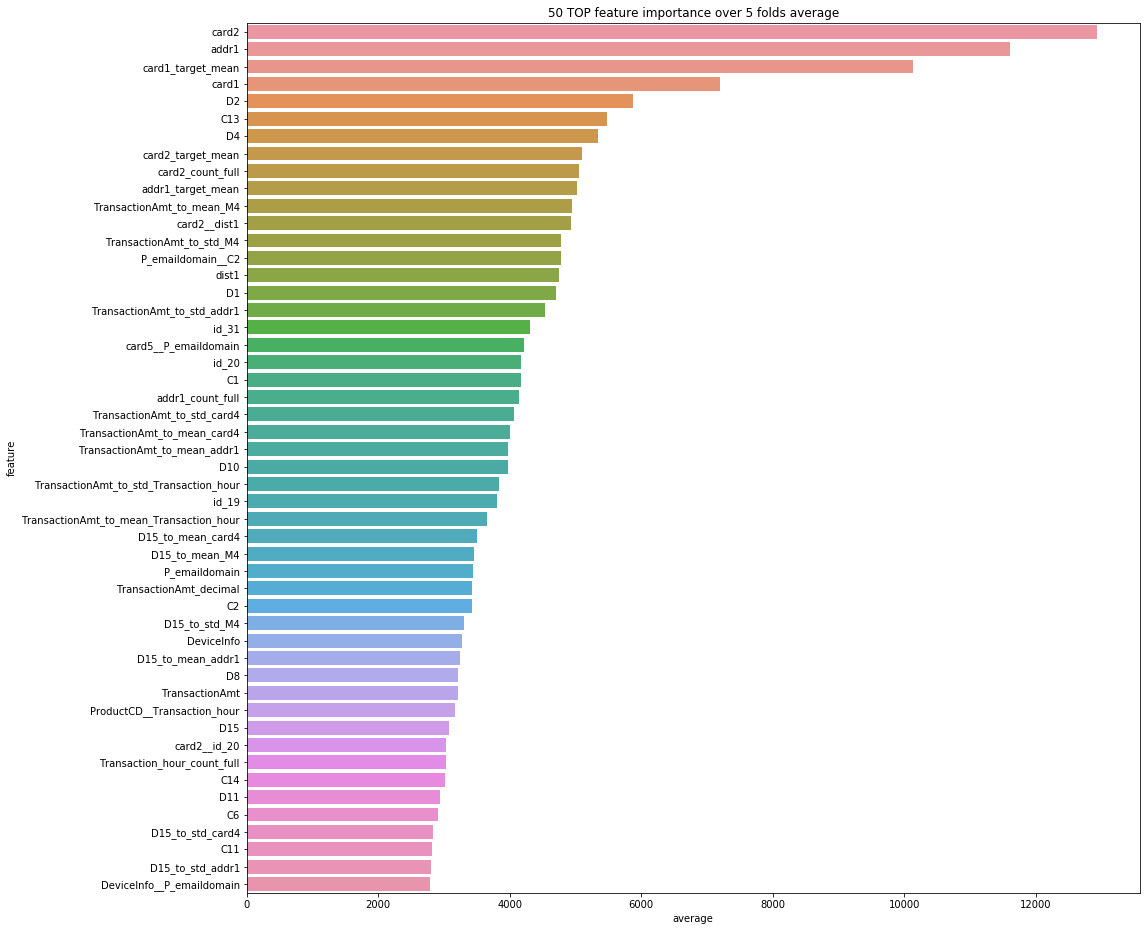

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
##take the mean of each feature importance of all folds. 
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));

In [60]:

sub = pd.DataFrame(columns=['TransactionID','isFraud'])
sub['TransactionID'] = test_trans_id
sub['isFraud'] = y_result
sub




sub.to_csv("submission41th.csv",index=False)

sum(y_result>0.1)


20707

In [62]:
sum(y_result>0.3)

10148